In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df = pd.read_csv('data/nfl_scores_processed.csv')

# drop the 'schedule_date', 'weather_detail' and 'over_under_line' column
df = df.drop(['schedule_date', 'weather_detail', 'over_under_line'], axis=1)
df.head()


,schedule_season,schedule_week,schedule_playoff,team_home,team_away,team_favorite_id,spread_favorite,weather_temperature,weather_wind_mph,weather_humidity,...,home_6,away_6,home_7,away_7,home_8,away_8,home_9,away_9,home_10,away_10
0,1979,1,False,Tampa Bay Buccaneers,Detroit Lions,home,-3.0,79.0,9.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1979,1,False,Buffalo Bills,Miami Dolphins,away,-5.0,74.0,15.0,74.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1979,1,False,Chicago Bears,Green Bay Packers,home,-3.0,78.0,11.0,68.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1979,1,False,Denver Broncos,Cincinnati Bengals,home,-3.0,69.0,6.0,38.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1979,1,False,Kansas City Chiefs,Indianapolis Colts,home,-1.0,76.0,8.0,71.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Turn non-numeric values into numeric

In [2]:
# week replacements for postseason
df['schedule_week'] = df['schedule_week'].replace('Wildcard', '1')
df['schedule_week'] = df['schedule_week'].replace('Division', '2')
df['schedule_week'] = df['schedule_week'].replace('Conference', '3')
df['schedule_week'] = df['schedule_week'].replace('Superbowl', '4')

# convert the 'schedule_week' column to int
df['schedule_week'] = df['schedule_week'].astype(int)

team_names = df['team_home'].unique()
# sort team names alphabetically
team_names.sort()

# create a dict with team names as keys and ints from 1 to 32 as values
team_names_to_id = {}
for i in range(len(team_names)):
    team_names_to_id[team_names[i]] = i + 1

# replace team names with ints in the df
df['team_home'] = df['team_home'].replace(team_names_to_id)
df['team_away'] = df['team_away'].replace(team_names_to_id)

# convert the 'team_favorite_id' column to 0 (home), 1 (away), 0.5 (PICK)
df['team_favorite_id'] = df['team_favorite_id'].replace('home', 0)
df['team_favorite_id'] = df['team_favorite_id'].replace('away', 1)
df['team_favorite_id'] = df['team_favorite_id'].replace('PICK', 0.5)

# convert the 'winner' column to 0 (home) or 1 (away), 0.5 (tie)
df['winner'] = df['winner'].replace('home', 0)
df['winner'] = df['winner'].replace('away', 1)
df['winner'] = df['winner'].replace('tie', 0.5)

# convert the home_1, ..., home_10 columns to 0 (loss), 1 (win) or 0.5 (tie), same for away
for i in range(1, 11):
    df['home_' + str(i)] = df['home_' + str(i)].replace('loss', 0)
    df['home_' + str(i)] = df['home_' + str(i)].replace('win', 1)
    df['home_' + str(i)] = df['home_' + str(i)].replace('tie', 0.5)
    df['away_' + str(i)] = df['away_' + str(i)].replace('loss', 0)
    df['away_' + str(i)] = df['away_' + str(i)].replace('win', 1)
    df['away_' + str(i)] = df['away_' + str(i)].replace('tie', 0.5)

# replace 'NaN' string with np.nan
df = df.replace('NaN', np.nan)

# show all columns
pd.set_option('display.max_columns', None)
df.head()

,schedule_season,schedule_week,schedule_playoff,team_home,team_away,team_favorite_id,spread_favorite,weather_temperature,weather_wind_mph,weather_humidity,winner,home_1,away_1,home_2,away_2,home_3,away_3,home_4,away_4,home_5,away_5,home_6,away_6,home_7,away_7,home_8,away_8,home_9,away_9,home_10,away_10
0,1979,1,False,30,11,0.0,-3.0,79.0,9.0,87.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1979,1,False,4,20,1.0,-5.0,74.0,15.0,74.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1979,1,False,6,12,0.0,-3.0,78.0,11.0,68.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1979,1,False,10,7,0.0,-3.0,69.0,6.0,38.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1979,1,False,16,14,0.0,-1.0,76.0,8.0,71.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# for all weather columns, fill the empty strings with the mean of the column
df['weather_temperature'].fillna(df['weather_temperature'].mean(), inplace=True)
df['weather_wind_mph'].fillna(df['weather_wind_mph'].mean(), inplace=True)
df['weather_humidity'].fillna(df['weather_humidity'].mean(), inplace=True)

df['weather_temperature'] = df['weather_temperature'].replace('', df['weather_temperature'].mean())
df['weather_wind_mph'] = df['weather_wind_mph'].replace('', df['weather_wind_mph'].mean())
df['weather_humidity'] = df['weather_humidity'].replace('', df['weather_humidity'].mean())


In [9]:
# drop all rows with 'NaN' values
df = df.dropna()

# drop all rows with 'winner' = 0.5 (tie)
df = df[df['winner'] != 0.5]

In [10]:
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('winner', axis=1), df['winner'], test_size=0.2, random_state=42)

In [11]:
print(y_train.value_counts())

0.0    5065
1.0    3686
Name: winner, dtype: int64


In [12]:
from sklearn.ensemble import RandomForestClassifier

# create a random forest classifier with 100 trees
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# fit the model on the training data
rf.fit(X_train, y_train)

# predict on the test data
y_pred = rf.predict(X_test)

# calculate accuracy on the test data
accuracy = (y_pred == y_test).mean()
print(f'Test accuracy: {accuracy:.3f}')


Test accuracy: 0.776


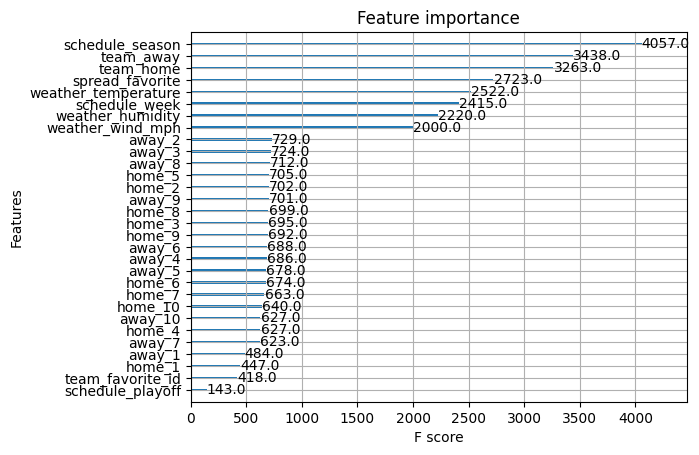

In [13]:
import xgboost as xgb
import matplotlib.pyplot as plt

# create an xgboost DMatrix from the train data
dtrain = xgb.DMatrix(X_train, label=y_train)

# create an xgboost model with 100 trees
xgb_model = xgb.train({'max_depth': 10, 'objective': 'multi:softmax', 'num_class': 3}, dtrain, num_boost_round=100)

# plot the feature importances
xgb.plot_importance(xgb_model)
plt.show()
